### Задания

#### Задача 1

На лекции обсудили, что некоторые результаты аналитики вызывают сомнения из-за способа проведения этой аналитики.

Разобрали пример: емейл-опрос показал, что 5% клиентов бронируют квесты по телефону, а не в интернете. Проблема в том, что выборка клиентов, у которых мы знаем емейл ответивших на наш емейл смещена относительно выборки всех клиентов. Результат опроса всех клиентов, в том числе не имеющих емейл, будет отличаться от результатов на подвыборке клиентов емейл-опроса. (стр. 22-23 презентации)

<br><br>
**Задание.**

Приведите реальный пример подобного сомнительного вывода.

Можете дать ссылку на страницу в интернете, либо добавить фото страницы книги/журнала/рекламы, на которой размещен сомнительный вывод. Поясните, что в этой аналитике не так.

#### Решение

nixCraft (твиттер аккаунт про linux с 220k подписчиками) провел опрос является ли linux наилучшей операционной системой для разработчиков. Результаты не удивительны, т.к. аудитория аккаунта люди, как минимум, интересующиеся linux. На мой взгляд, этот случай весьма похож на пример, приведенный на лекции.
<img src='linux_poll.png'>

#### Задание 2
У Тинькофф Квест есть бонусные купоны. Такой купон дает право участия в квесте со скидкой. Купоны бывают трех типов: Alpha, Beta, Gamma. Они немного отличаются по условиям, в том числе по сроку действия, а также выдаются в разных точках. Каждый купон имеет свой Id; дата выдачи каждого купона фиксируется. Человек, получивший купон, может им воспользоваться или не воспользоваться.

**Задание.**

Проанализируйте уровень использования каждого типа купонов и сравните их между собой. В ответе укажите процент использования каждого типа и подтвердите эти цифры таблицей/графиком, по которым вы сделали вывод.

Допустим, сегодня 11 апреля 2021.

Данные по купонам, выданным с 1 ноября 2020г по вчерашний день (10.04.21).

**Структура данных:**

card_nm - название типа купонов

card_id - Id конкретного купона

receive_dt - дата выдачи купона

use_dt - дата использования купона (если есть) 

#### Решение

In [126]:
# импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
# загрузка данных
df = pd.read_excel('task2.xlsx')

df

,card_nm,card_id,receive_dt,use_dt
0,Beta,7637320,2020-11-02,NaT
1,Alpha,7635974,2020-11-02,NaT
2,Alpha,7635511,2020-11-02,NaT
3,Gamma,7635258,2020-11-02,2020-12-13
4,Beta,7634217,2020-11-02,NaT
...,...,...,...,...
6759,Alpha,637512,2021-04-08,NaT
6760,Beta,637397,2021-04-08,NaT
6761,Alpha,628982,2021-04-08,2021-04-10
6762,Beta,625773,2021-04-08,NaT


In [128]:
# посмотрим общую информацию о данных (тип данных, количество пропусков)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6764 entries, 0 to 6763
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   card_nm     6764 non-null   object        
 1   card_id     6764 non-null   int64         
 2   receive_dt  6764 non-null   datetime64[ns]
 3   use_dt      1594 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 211.5+ KB


In [129]:
# посчитаем количество дней до утилизации
df['delta'] = df['use_dt'] - df['receive_dt']

In [130]:
# переведем delta в дни (из ns)
df['delta'] = df.delta.fillna(pd.Timedelta(days=0))

In [131]:
# перевдем дни в целочисленный формат
df['delta'] = df['delta'].dt.days.astype('int8')

In [132]:
# произведем агрегацию по типу купонов и посчитаем количество использованных купонов
# и среднее количество дней на утилизацию для каждого типа купонов
df_cr = df.groupby('card_nm', as_index=False) \
    .agg({'card_id': 'count', 'use_dt': 'count', 'delta': 'mean'}) \
    .rename(columns={'card_id': 'issued', 'use_dt': 'utilized', 'delta': 'avg_util_dt'})

In [133]:
# посчитаем конверсию в утилизацию
df_cr['cr'] = df_cr.utilized / df_cr.issued

df_cr['avg_util_dt'] = df_cr['avg_util_dt'].round(0)
df_cr['cr_pct'] = df_cr['cr'].multiply(100).round(1)

df_cr

,card_nm,issued,utilized,avg_util_dt,cr,cr_pct
0,Alpha,3570,812,3.0,0.227451,22.7
1,Beta,1272,89,1.0,0.069969,7.0
2,Gamma,1922,693,13.0,0.360562,36.1


In [161]:
# срез динамики выдачи купонов
df_amount = df.groupby(['card_nm', 'receive_dt'], as_index=False) \
    .agg({'card_id': 'count'}) \
    .rename(columns={'card_id': 'issued'})

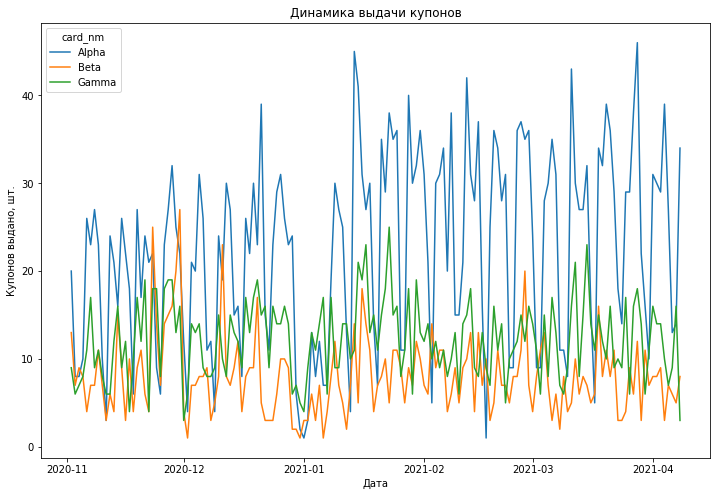

In [162]:
# отрисовываем график
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_amount, x='receive_dt', y='issued', hue='card_nm');

# оформление осей
plt.xlabel('Дата');
plt.ylabel('Купонов выдано, шт.');
plt.title('Динамика выдачи купонов')

# сохраняем график
plt.savefig('coupon_issued.png');

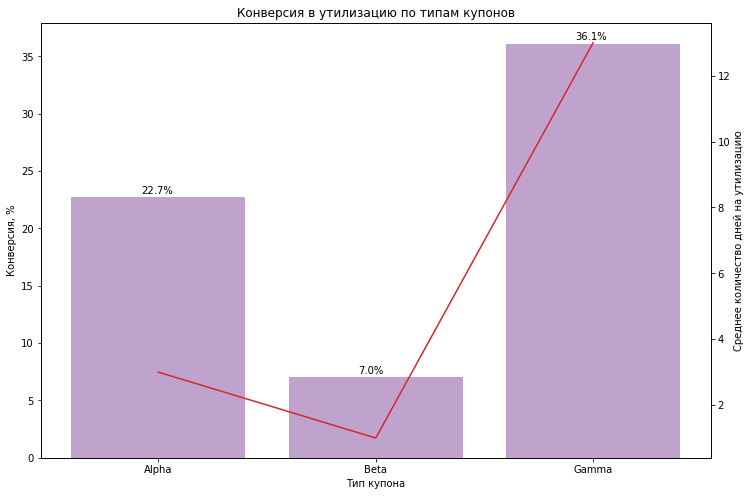

In [134]:
# отрисовываем график (столбчатая диаграмма conversion_rate)
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=df_cr.card_nm, y=df_cr.cr_pct, color='#C39CD3');

# оформление осей
plt.xlabel('Тип купона');
plt.ylabel('Конверсия, %');
plt.title('Конверсия в утилизацию по типам купонов');

# добавляем подписи процентов
for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height())
        x = p.get_x() + p.get_width() / 2.5
        y = p.get_y() + p.get_height() + 0.3
        ax.annotate(percentage, (x, y))

        
# добавляем второй график 
ax2 = ax.twinx()
color = 'tab:red'
# отрисовываем и оформляем второй график(линейный график количества конверсий в штуках)
ax2.set_ylabel('Среднее количество дней на утилизацию')
ax2 = sns.lineplot(x='card_nm', y='avg_util_dt', data = df_cr, sort=False, color=color)
ax2.tick_params(axis='y')
      

# сохраняем график
plt.savefig('cr_by_coupon.png')

#### Задание 3  
В этом задании дано несколько кейсов, в каждом из них необходимо написать метрики, которые помогут вам решить поставленную задачу. В ответе требуется написать 1-3 ключевые метрики, которые вы бы посмотрели/сравнили в первую очередь. Методы анализа и пояснения, как именно вы бы анализировали, расписывать не нужно, только сами метрики. Также не нужно принимать во внимание сложность/погрешность данного измерения в реальности - здесь предполагаем, что можем честно измерить все что угодно.

**Пример.**
Какие метрики нужны, чтобы понять, какой из двух бегунов на одинаковые дистанции лучше?
Ответ: средняя скорость
(Ответ "среднее время прохождения" тоже подходит. Правильный ответ чаще всего не единственный)

**Кейсы:**

1. Какие метрики нужны, чтобы понять, какой из двух пекарей, выпекающих булочки, работает более качественно? Считаем, что если булочка не подгорела - то она качественная.
2. Какие метрики нужны, чтобы понять, какой из двух сортов кофе в интернет-магазине лучше продается? Считаем, что на сайте они расположены на одной странице и примерно одинаково, т.е. их расположение на сайте ни на что не влияет.
3. Какие метрики нужны, чтобы понять, какая из двух компьютерных версий игры "сапёр" лучше удерживает игроков?
4. Вы - инвестор, и готовы купить одну из двух компаний по производству и продаже кроссовок. Какие метрики нужны, чтобы понять, в какую из двух компаний лучше проинвестировать? Считаем, что после вашей инвестиции компания будет работать точно так же, как и до.
5. Вы - владелец кофейни. Какие метрики нужны, чтобы понять, какой из двух видов шоколадок стоит в вашей кофейне продавать? Также сформулируйте цель, которую вы как владелец добьетесь, сделав выбор по вашим метрикам.
6. Есть два сайта по продаже авиабилетов. Чтобы купить авиабилет, на каждом из сайтов нужно совершить следующие действия: 1) зайти на сайт, 2) положить билет в корзину, 3) оплатить. Какие метрики нужны, чтобы понять, на каком из сайтов процесс покупки работает эффективнее?

#### Решение  
1. процент пригоревших булочек от дневного плана по количству произведенных изделий
2. количество проданных единиц сортов кофе; доля продаж сортов кофе в общем обороте интернет-магазина
3. retention; когортный анализ (по оси У количество минут в день, проведенных в игре)
4. стоимость покупки фабрики и ее чистую прибыль, чтобы оценить норму прибыли (рентабельность по чистой прибыли)
5. оценить кросс-продажи каждого из вида шоколадок, т.е. как тот или иной вид шоколада влияет на средний чек и повторные покупки, т.е. отследить динамику изменения среднего чека, чтобы не произошло сценария, что средний чек увеличился, а потом вернулся на свои прежние показатели.  Цель: увеличить средний чек.
6. воронка утилизации (конверсии на каждом из этапов)

#### Задание 4
Вы - аналитик зоопарка, в нем много разных животных, в том числе есть вольер с белыми медведями.

Вы проанализировали, что на прошлой неделе у белых медведей было 2000 посетителей, а на этой - 1000.

Выскажите 10 разных гипотез, почему так могло произойти, и как каждую из этих гипотез проверить.

#### Решение
1. На прошлой неделе были новогодние/майские праздники, что привело к увеличению количества посетителей. Посмотреть календарь.
1. На прошлой неделе были посещения организованных школьных групп с экскурсиями, а на этой нет. Посмотреть стратификацию посетителей.
1. На прошлой неделе проводилась международная неделя живой природы / день защиты белых медведей, что вызвало всплеск посещаемости. Посмотреть в календарь праздников.
1. На прошлой неделе был инфо-повод (например, сюжет в новостях, что медведица родила медвежат), что вызвало повышенный интерес публики. Свериться с pr-отделом и ответственным сотрудником по белым медведям.
1. На позапрошлой неделе провели рекламную активность по привлечению посетителей, что дало результат, а на этой неделе вернулись к своим прежним показателям.
1. Три дня назад объявили всеобщий карантин и режим самоизоляции, поэтому в эти выходные посетителей не было вовсе. В итоге средняя недельная посещаемость упала в два раза.
1. На этой неделе зоопарк несколько дней был на профилактике, поэтому средняя недельная посещаемость упала. Посмотреть подневную посещаемость на этой неделе и сравнить с прошлой.
1. Медведи недавно впали в спячку, поэтому интерес посетителей значительно снизился. Уточнить у зоотехников так ли это (насчет спячки).
1. На прошлой неделе компания зоозащитников провела глобальную компанию в интернете против содержания зверей в зоопарках. Похоже это могло повлиять на посещаемость и нашего зоопарка. Пособирать информацию в сети о подобного рода акциях, для опровержения данной гипотезы.
1. Возможно еще только четверг и данная неделя не является полным закрытым периодом, поэтому и посещаемость за эту неделю сейчас в два раза ниже. Посмотреть в календарь и если это действительно так, то не переживать, т.к. на выходных показатели обязательно выровняются. 